In [1]:
%load_ext version_information
%version_information numpy, pandas, matplotlib

Software versions
Python 3.10.13 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.15.0
OS Windows 10 10.0.19045 SP0
numpy 1.26.0
pandas 2.1.1
matplotlib 3.7.2
Tue Oct 24 15:59:38 2023 Mitteleuropäische Sommerzeit

In [12]:
# ===== IMPORTS =======================================
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
 # Import data
data = pd.read_csv("boston.csv")

prices = data["TGT"]

data.drop("TGT", axis=1, inplace=True)
data.drop("Index", axis=1, inplace=True)

In [14]:
# Center and normalize variance
for entry in data:
    variance = data[entry].var()
    data[entry] -= data[entry].mean()
    data[entry] /= math.sqrt(variance)

In [15]:
 # Creating the design matrix
print(f"Creating design matrix {len(data)}x{len(data.columns)}")
design_matrix = np.empty((len(data), len(data.columns)))
design_matrix[:, :len(data.columns)] = data.values

Creating design matrix 506x13


In [16]:
# Compute svd
U, D, V = np.linalg.svd(design_matrix)

In [17]:
# Change D so that it holds the Eigenvalues of the Covmatrix
# The Change is needed because through svd we only get the deviation in not normalized
# Those Eigenvalues represent the new variances of the transformed data
# therefore D is the new Covariance Matrix, because the transformed data
# is uncorrelated
# The eigenvalues are ordered by greatness. So biggest eigenvalue is at (0, 0)
new_cov_matrix = D**2 / (len(data)-1)
eigenvectors = V

In [18]:
# Compute defined variance and cumulative
l = len(new_cov_matrix)
defined_variance = new_cov_matrix[:l]/np.sum(new_cov_matrix)
cumulative_variance = np.cumsum(defined_variance)

output_variance = pd.DataFrame({
    "D" : new_cov_matrix,
    "Erklärte Varianz" : defined_variance,
    "Kumulierte erklärte Varianz" : cumulative_variance
})

print(f"{output_variance}\n\n")

           D  Erklärte Varianz  Kumulierte erklärte Varianz
0   6.122655          0.470973                     0.470973
1   1.432063          0.110159                     0.581132
2   1.241163          0.095474                     0.676606
3   0.857799          0.065985                     0.742591
4   0.834566          0.064197                     0.806788
5   0.659651          0.050742                     0.857531
6   0.539017          0.041463                     0.898993
7   0.396544          0.030503                     0.929497
8   0.277435          0.021341                     0.950838
9   0.220260          0.016943                     0.967781
10  0.186164          0.014320                     0.982101
11  0.169167          0.013013                     0.995114
12  0.063516          0.004886                     1.000000


In [20]:
# Transform the data
scores = np.dot(design_matrix, eigenvectors[:3].T)
scores = pd.DataFrame(scores, columns=["X", "Y", "Z"])

In [22]:
# Compute correlation matrix with the original data
combination = np.hstack((scores, design_matrix))
multi_cov = np.corrcoef(combination, rowvar=False)
print(f"Korelationsmatrix mit ursprünglichen Daten:\n{np.round(multi_cov,2)}\n\n")

Korelationsmatrix mit ursprünglichen Daten:
[[ 1.    0.    0.    0.62 -0.63  0.86  0.01  0.85 -0.47  0.78 -0.8   0.79
   0.84  0.51 -0.5   0.77]
 [ 0.    1.   -0.   -0.37 -0.38  0.13  0.55  0.26  0.18  0.37 -0.42 -0.32
  -0.29 -0.37  0.28 -0.09]
 [ 0.   -0.    1.    0.28  0.33 -0.02  0.32  0.13  0.66 -0.02 -0.05  0.32
   0.25 -0.36 -0.34 -0.3 ]
 [ 0.62 -0.37  0.28  1.   -0.2   0.4  -0.06  0.42 -0.22  0.35 -0.38  0.62
   0.58  0.29 -0.38  0.45]
 [-0.63 -0.38  0.33 -0.2   1.   -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31
  -0.31 -0.39  0.18 -0.41]
 [ 0.86  0.13 -0.02  0.4  -0.53  1.    0.06  0.76 -0.39  0.64 -0.71  0.6
   0.72  0.38 -0.36  0.6 ]
 [ 0.01  0.55  0.32 -0.06 -0.04  0.06  1.    0.09  0.09  0.09 -0.1  -0.01
  -0.04 -0.12  0.05 -0.05]
 [ 0.85  0.26  0.13  0.42 -0.52  0.76  0.09  1.   -0.3   0.73 -0.77  0.61
   0.67  0.19 -0.38  0.59]
 [-0.47  0.18  0.66 -0.22  0.31 -0.39  0.09 -0.3   1.   -0.24  0.21 -0.21
  -0.29 -0.36  0.13 -0.61]
 [ 0.78  0.37 -0.02  0.35 -0.57  0.64  0.09  0.7

C:\Users\HTWG\AppData\Local\Temp\ipykernel_6536\1768980600.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower.drop("TGT", axis=1, inplace=True)
C:\Users\HTWG\AppData\Local\Temp\ipykernel_6536\1768980600.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher.drop("TGT", axis=1, inplace=True)


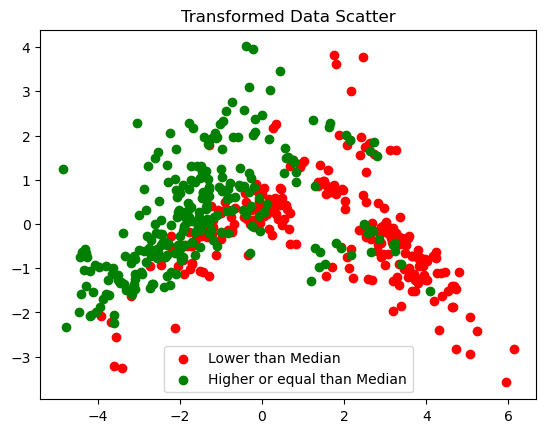

In [23]:
# Show the Scatter Plot
scores.drop("Z", axis=1, inplace=True)

# Split according to price
scores = scores.join(prices)
lower = scores[scores["TGT"] < prices.median()]
higher = scores[scores["TGT"] >= prices.median()]

lower.drop("TGT", axis=1, inplace=True)
higher.drop("TGT", axis=1, inplace=True)

plt.scatter(lower["X"], lower["Y"], label="Lower than Median", color="red")
plt.scatter(higher["X"], higher["Y"], label="Higher or equal than Median", color="green")
plt.legend()
plt.title("Transformed Data Scatter")
plt.show()

In [ ]:
# Eignung der neuen Variablen: Bedingt, da Bereiche in der Mitte doch sehr vermischt sind. Tendenz zu Cluster aber vorhanden.